In [1]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json
ans=[0]*5

In [2]:
#Import the dataset and define the feature as well as the target datasets / columns 
...
dataset = pd.read_csv('zoo.csv')
#We drop the animal names since this is not a good feature to split the data on. 
...
...
dataset=dataset.drop('animal_name',axis=1)

In [3]:
#Write a function to find the entropy on a split "target_col"
#def entropy(target_col):
...
...
...
def entropy(target_col):
  elements,counts = np.unique(target_col,return_counts = True)
  entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
  return entropy

In [4]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']
...
...

Ellipsis

In [5]:
#Find the entropy of the feature "toothed"
...
ans[0]=entropy(dataset.toothed)

In [6]:
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(data,split_attribute_name,target_name="class"):       
    #Calculate the entropy of the total dataset  
    ...
    #Calculate the values and the corresponding counts for the split attribute   
    ... 
    #Calculate the weighted entropy  
    ...
    #Calculate the information gain  
    ...
    ...
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [7]:
#Find the information gain having split attribute "hair" and the target feature name "milk"
...
ans[1]=InfoGain(dataset,"hair","milk")

In [8]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
...
info_gain_milk = []
for i in feature_names:
  if(i!='milk'):
    info_gain_milk.append(InfoGain(dataset,"milk",i))

In [9]:
X = dataset[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']]
Y = dataset[['class_type']]

In [10]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(X, Y,test_size=0.2, random_state=42, stratify = Y)

In [11]:
#Fit the given data
...
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

In [12]:
#Make a prediction on the test data and return the percentage of accuracy
...
...
prediction = tree.predict(test_features)
acc = tree.score(test_features,test_targets)*100
ans[2]=acc

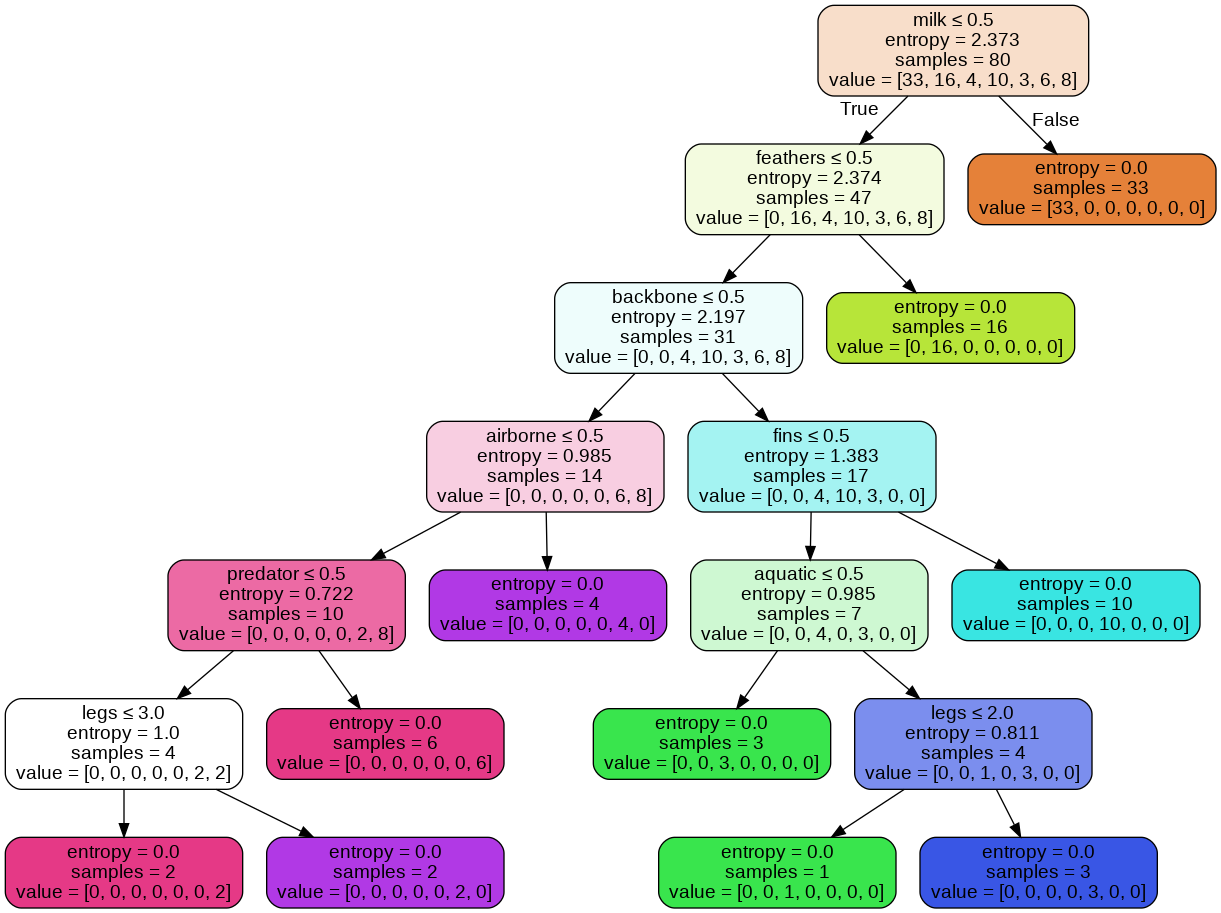

In [ ]:
#Run this cell to visualize the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
#Use sklearn to make a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix,f1_score, recall_score
...
...
...


Ellipsis

In [14]:
print(classification_report(test_targets, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [15]:
#Find the recall,f1-score for class type '3'
f1 = f1_score(test_targets, prediction,average = None)
recall = recall_score(test_targets, prediction,average = None)
a = [f1[2],recall[2]]
ans[3]=a

In [16]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
...
...
...
from math import sqrt
def mae_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    sum_error += abs(predicted[i] - actual[i])
  return sum_error

def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [17]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
actual = test_targets.class_type
ac = []
for i in actual:
  ac.append(i)
b = [mae_metric(ac, prediction),rmse_metric(ac, prediction)]
ans[4]=b

In [18]:
for i in range(0,5):
  s = ''
  s = s + 'ans[' + str(i) + ']' + " : " + str(ans[i])
  print(s)

ans[0] : 0.9685867165455516
ans[1] : 0.6599660577558698
ans[2] : 100.0
ans[3] : [1.0, 1.0]
ans[4] : [0.0, 0.0]


In [19]:
##do not change this code
import json
ans = [str(item) for item in ans]

filename = "aryanpcm@gmail.com_Aryan_Singh_DecisionTrees"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LinearRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [20]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'aryanpcm@gmail.com_Aryan_Singh_DecisionTrees',
 'status': 'Success'}
